In [ ]:
import math
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [10]:
def trapezoid_rule(func, a, b, nseg):
    """Правило трапеций
       nseg - число отрезков, на которые разбивается [a;b]"""
    dx = 1.0 * (b - a) / nseg
    s = 0.5 * (func(a) + func(b))  # s: сумма
    for i in range(1, nseg):
        s += func(a + i * dx)

    return s * dx

In [11]:
def func(x):
    return math.cos(x) / (1 + 3 * x)

In [12]:
a = 0
b = 1
n_exact = 10 ** 7
nseg_vals = [10, 100, 10 ** 3, 10 ** 4, 10 ** 5, 10 ** 6, 10 ** 7]

In [13]:
exact_val = trapezoid_rule(func, a, b, n_exact)
exact_val

0.4110176125371348

In [14]:
gauss_conrod = quad(func, a, b)
gauss_conrod

(0.41101761253712565, 1.6340216537894802e-11)

In [15]:
errors = []
for nseg in nseg_vals:
    approx_val = trapezoid_rule(func, a, b, nseg)
    errors.append(abs(gauss_conrod[0] - approx_val))

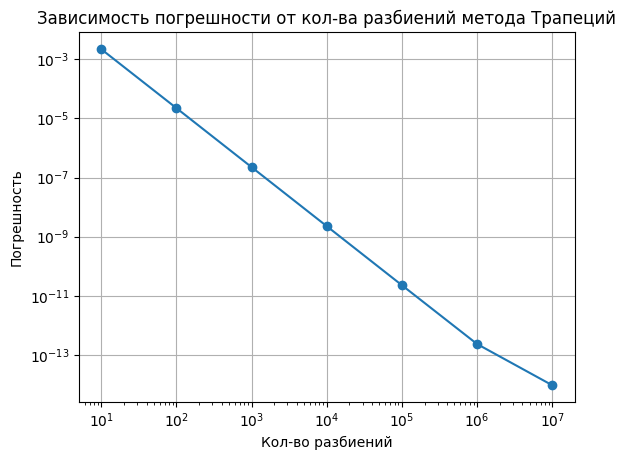

In [16]:
plt.plot(nseg_vals, errors, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Кол-во разбиений')
plt.ylabel('Погрешность')
plt.title('Зависимость погрешности от кол-ва разбиений метода Трапеций')
plt.grid(True)
plt.show()
